In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../code')
from mscfunctions import *
from diusst_funcs import *

In [70]:
data_path = '../data/bayesian_training/'
data_filename = 'training_minnett_err-boatspd-x2_humid10.csv'
data_interval1 = [96,413]
data_interval2 = [700,1585]#[0,-1]#
removeidx2 = []#[69,74,81,82,99,100,171,172,176]#[]

# Load dataset
data_orig1 = pd.read_csv(data_path+data_filename)[data_interval1[0]:data_interval1[1]]

data_orig2_dirty = pd.read_csv(data_path+data_filename)[data_interval2[0]:data_interval2[1]]
data_orig2 = data_orig2_dirty.drop(data_orig2_dirty.index[removeidx2])

# extract data from dataset 1
ftemp1 = np.mean(data_orig1['ftemp'].to_numpy(np.float64))
times_orig1 = data_orig1['times'].to_numpy(np.float64)
sst_data1 = data_orig1['sst'].to_numpy(np.float64) - data_orig1['ftemp'].to_numpy(np.float64)
sst_err1 = data_orig1['sst_err'].to_numpy(np.float64)
# extract data from dataset 2
ftemp2 = np.mean(data_orig2['ftemp'].to_numpy(np.float64))
times_orig2 = data_orig2['times'].to_numpy(np.float64)
sst_data2 = data_orig2['sst'].to_numpy(np.float64) - data_orig2['ftemp'].to_numpy(np.float64)
sst_err2 = data_orig2['sst_err'].to_numpy(np.float64)

times = data_orig2['times'].to_numpy(np.float64)
atemp = data_orig2['atemp'].to_numpy(np.float64)
wind = data_orig2['wind'].to_numpy(np.float64)
humid = data_orig2['humid'].to_numpy(np.float64)
swrad = data_orig2['swrad'].to_numpy(np.float64)

In [71]:
def slab(times, Ta_data, u, swrad, s_a, d=1, sink=100, Tf=300):
    
    T = np.ones(len(times))*Tf
    dt = times[1:]-times[:-1]
    
    n_w = 1.34                     # refractive index of sea water
    n_a = 1.0                     # refractive index of air
    rho_w = 1027                   # density of sea water (in kg/m^3)
    rho_a = 1.1                    # density of air (in kg/m^3)
    C_s = 1.3e-3                   # turbulent exchange coefficient for sensible heat
    C_l = 1.5e-3                   # turbulent exchange coefficient for latent heat
    L_evap = 2.5e6                 # latent heat of evaporization (J/kg) Source: Klose p.151
    c_p = 3850                     # specific heat of sea water at const pressure (in J/K/kg)
    c_p_a = 1005                   # specific heat of air at const pressure (in J/K/kg)
    sb_const = 5.67e-8             # Stefan Boltzmann constant (in W/m^2/K^4)
    R_v = 461.51     
    opac=1
    
    for n in range(1,len(times)):
        #print(u[n-1])
        R_lw = sb_const * (opac*(Ta_data[n-1])**4 - (T[n-1])**4)
        Q_s  = rho_a * c_p_a * C_s * max(0.5, u[n-1]) * (Ta_data[n-1] - T[n-1])
        Q_l  = rho_a * L_evap * C_l * max(0.5, u[n-1]) * (s_a[n-1] - s_sat(T[n-1], rho_a, R_v))
        
        dT = dt[n-1]/(rho_w*c_p*d)*(swrad[n]+R_lw+Q_s+Q_l-sink)
        
        T[n] = T[n-1]+dT
    
    return T

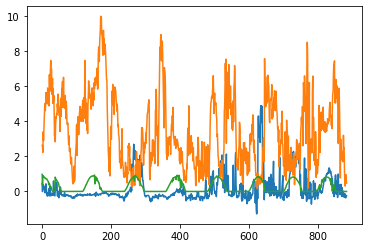

In [72]:
plt.plot(sst_data2)
plt.plot(wind)
plt.plot(swrad/1000)

In [73]:
res = slab(times,atemp,wind,swrad,humid,Tf=ftemp2,sink=50,d=1)

In [74]:
atemp[1]**4

8436238866.396485

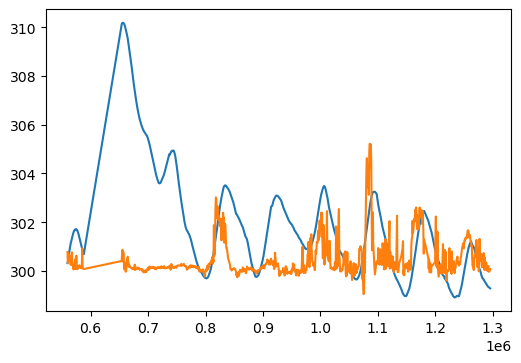

In [75]:
fig, ax = plt.subplots(dpi=100)
ax.plot(times,res)
ax.plot(times,sst_data2+ftemp2)